<a href="https://colab.research.google.com/github/atrinasalsabilnengkoda/PCVK_Genap_2021/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow #imagedisplay
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


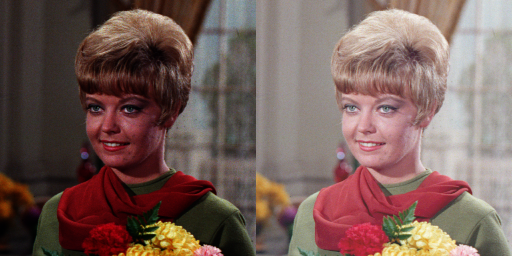

In [15]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/Images/female.tiff')
gamma_corrected = np.zeros(original.shape, original.dtype)

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_corrected[y,x,c] = np.clip(255 * pow(original[y,x,c]/255, (1/gamma)),0,255);

final_frame = cv.hconcat((original, gamma_corrected))
cv2_imshow(final_frame)

Depth on citra 
--------------------------
Input bit depth value : 3


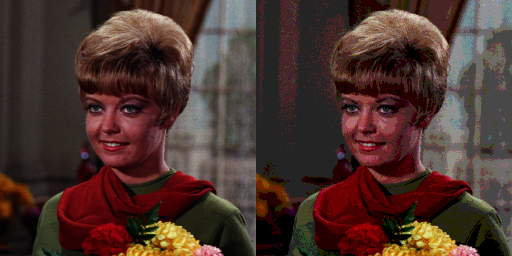

In [27]:
image = cv.imread('/content/drive/MyDrive/PCVK/Images/Images/female.tiff')
depth_image = np.zeros(image.shape, image.dtype)

print('Depth on citra ')
print('--------------------------')
try:
  bd = float(input('Input bit depth value : '))
except ValueError:
  print('Error, not a number')
bit=2**bd
level = 255/(bit-1)
for y in range(image.shape[0]):
  for x in range(image.shape[1]):
    for c in range(image.shape[2]):
      depth_image[y,x,c] = np.clip(round(image[y,x,c]/level)*level,0,255);

final_frame = cv.hconcat((image, depth_image))
cv2_imshow(final_frame)

Value of PSNR is 27.536073966869555 (dB)


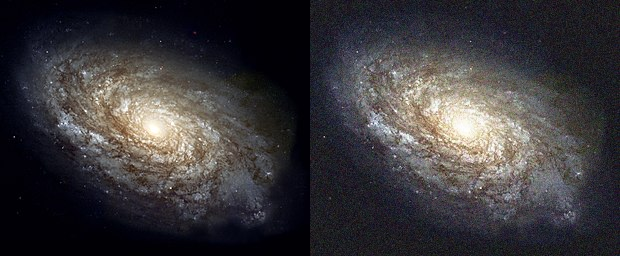

In [19]:
import glob
from math import log10, sqrt
  
original_image = cv.imread('/content/drive/MyDrive/PCVK/Images/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) pict in folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original_image, compressed): 
    mse = np.mean((original_image - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original_image, compressed)

print('Value of PSNR is',psnr,'(dB)')
galaxy_frame = cv.hconcat((original_image, dst))
cv2_imshow(galaxy_frame)

Value of PSNR is 27.524562543017744 (dB)


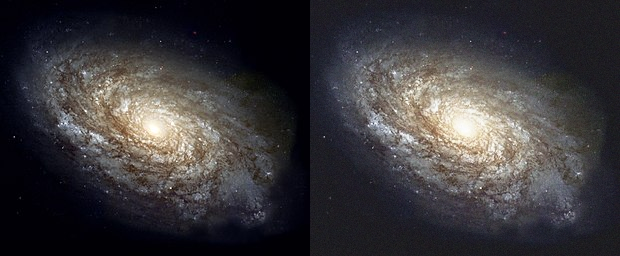

In [21]:
# average 30
dst = cv_img[0]
noise_number = 29 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original_image, compressed)

print('Value of PSNR is',psnr,'(dB)')
galaxy_frame = cv.hconcat((original_image, dst))
cv2_imshow(galaxy_frame)

Value of PSNR is 27.49674877373203 (dB)


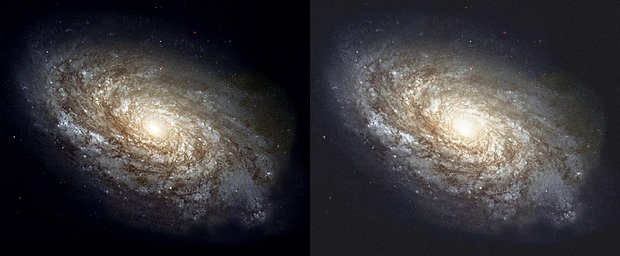

In [22]:
# average 60
dst = cv_img[0]
noise_number = 59 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original_image, compressed)

print('Value of PSNR is',psnr,'(dB)')
galaxy_frame = cv.hconcat((original_image, dst))
cv2_imshow(galaxy_frame)

Value of PSNR is 27.50847838662391 (dB)


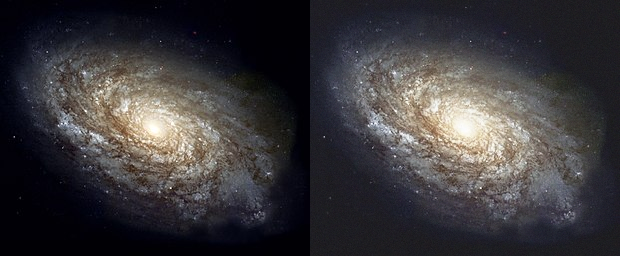

In [24]:
# average 80
dst = cv_img[0]
noise_number = 79 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original_image, compressed)

print('Value of PSNR is',psnr,'(dB)')
galaxy_frame = cv.hconcat((original_image, dst))
cv2_imshow(galaxy_frame)

Value of PSNR is 27.514741068934295 (dB)


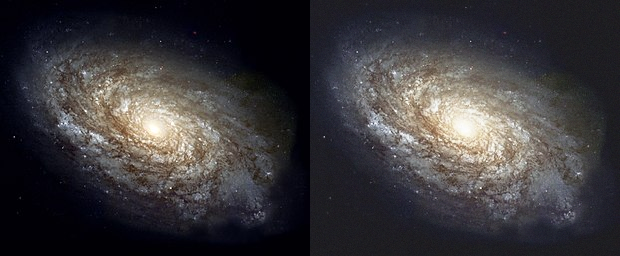

In [25]:
# average 100
dst = cv_img[0]
noise_number = 99 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original_image, compressed)

print('Value of PSNR is',psnr,'(dB)')
galaxy_frame = cv.hconcat((original_image, dst))
cv2_imshow(galaxy_frame)

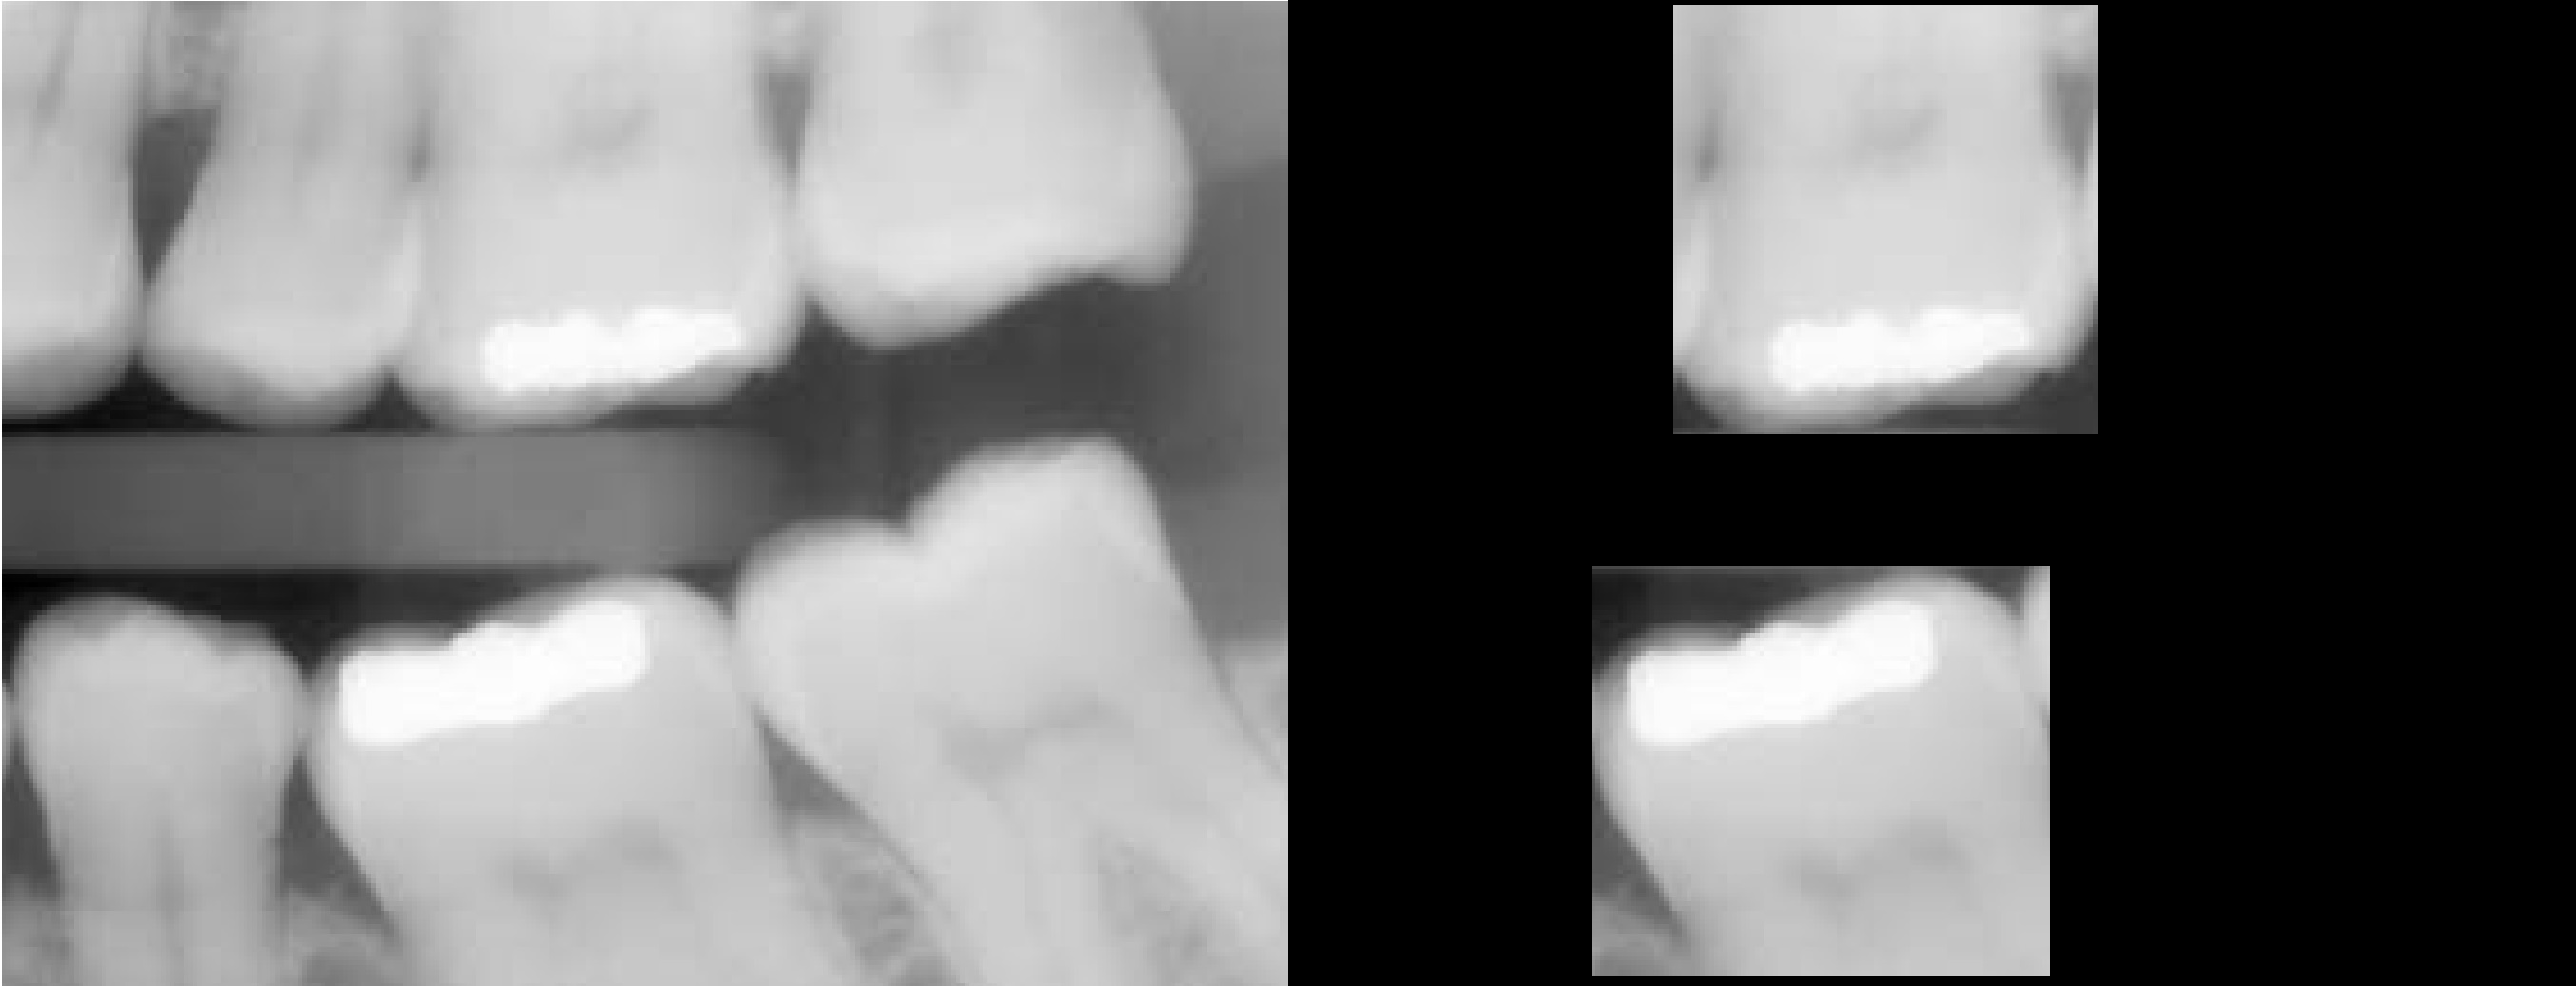

In [36]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/Images/teeth.jpg')
img_mask = np.zeros(img.shape, dtype=np.uint8)
img_mask = cv.rectangle(img_mask,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img & img_mask
img_mask1 = cv.rectangle(img_mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)
result = img & img_mask1

final_frame = cv.hconcat((img, result))
cv2_imshow(final_frame)

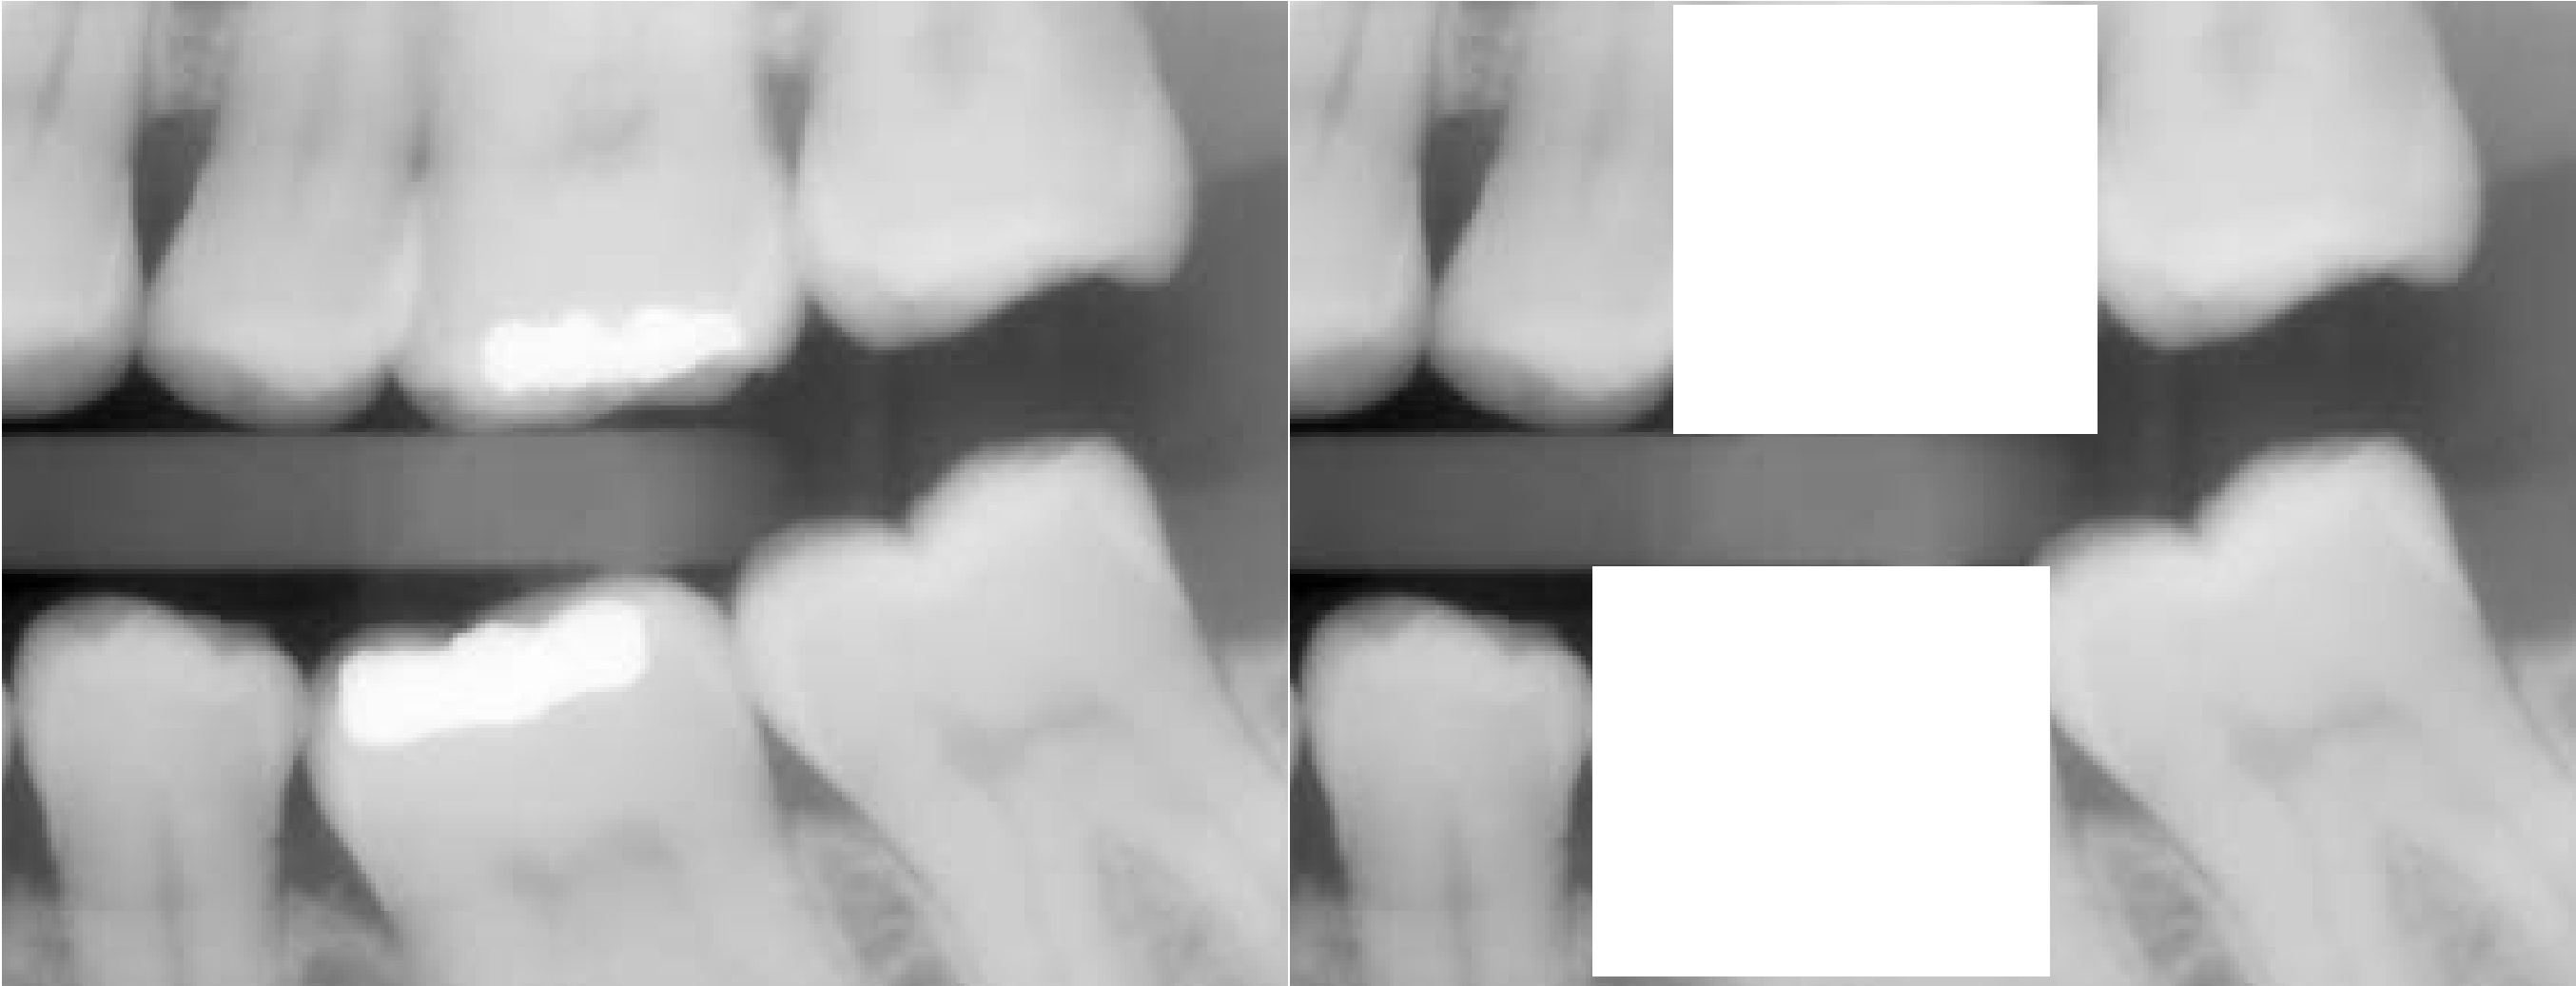

In [39]:
# OR Operation 
img_or = cv.imread('/content/drive/MyDrive/PCVK/Images/Images/teeth.jpg')
mask_or = np.zeros(img_or.shape, dtype=np.uint8)
mask_or = cv.rectangle(mask_or,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img_or | mask_or
mask_or1 = cv.rectangle(mask_or,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)
result_or1 = img_or | mask_or1

final_frame = cv.hconcat((img_or, result_or1))
cv2_imshow(final_frame)

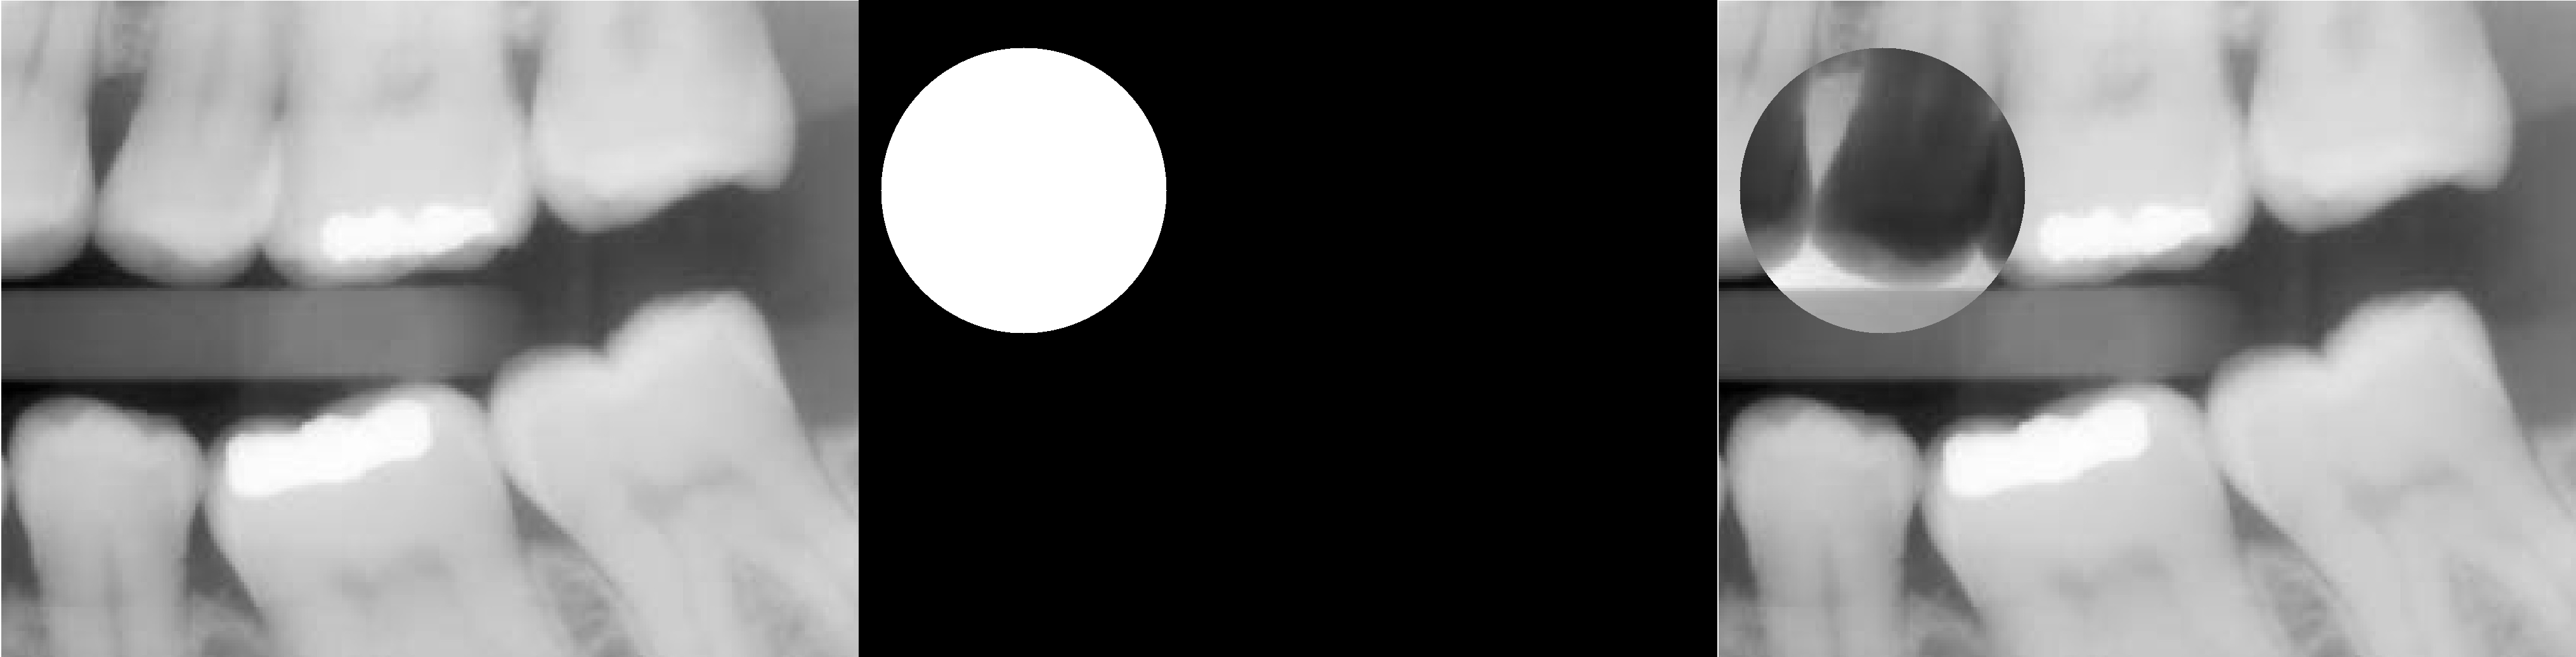

In [44]:
# NOT Operation 
img_not = cv.imread('/content/drive/MyDrive/PCVK/Images/Images/teeth.jpg')
mask_not = np.zeros(img_not.shape, dtype=np.uint8)
mask_not = cv.circle(mask_not, (260, 300), 225, (255,255,255), -1)

result_not = img_not ^ mask_not

final_frame = cv.hconcat((img_not, mask_not, result_not))
cv2_imshow(final_frame)

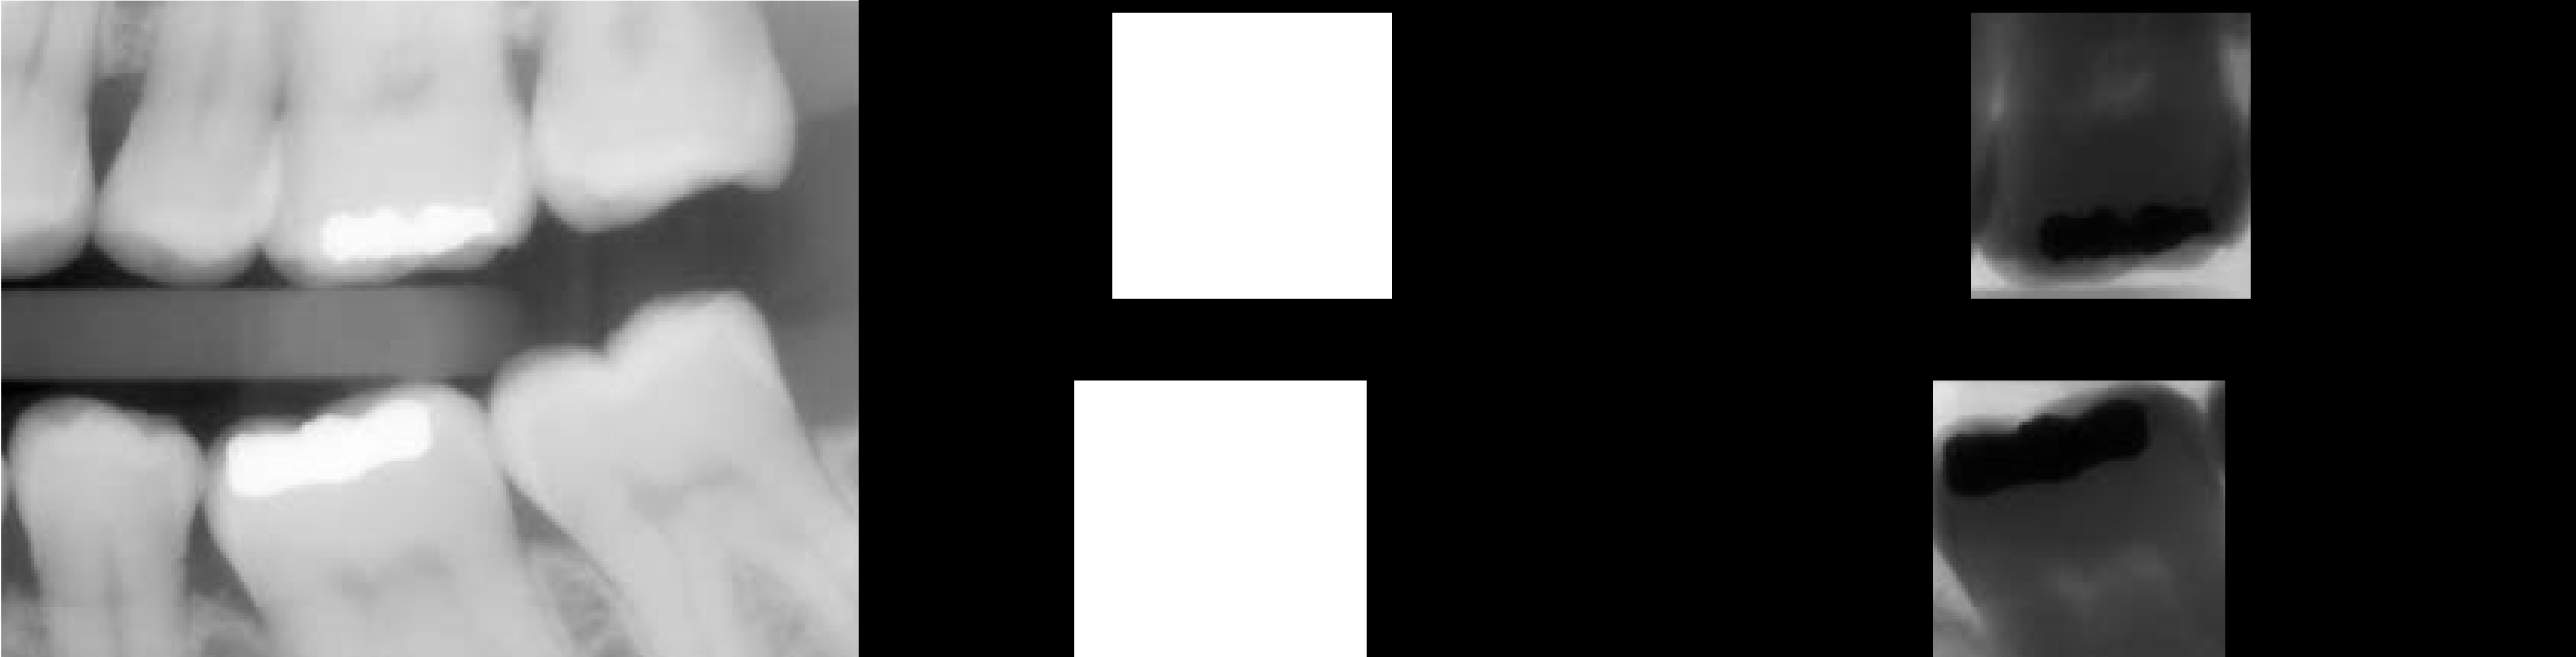

In [45]:
# NAND Operation 
img_nand = cv.imread('/content/drive/MyDrive/PCVK/Images/Images/teeth.jpg')
mask_nand = np.zeros(img_nand.shape, dtype=np.uint8)
mask_nand = cv.rectangle(mask_nand,pt1=(400,20),pt2=(840,470),color=(255,255,255), thickness=-1)
mask_nand = cv.rectangle(mask_nand,pt1=(340,600),pt2=(800,1200),color=(255,255,255), thickness=-1)

result_nand = ~img_nand & mask_nand

final_frame = cv.hconcat((img_nand, mask_nand, result_nand))
cv2_imshow(final_frame)

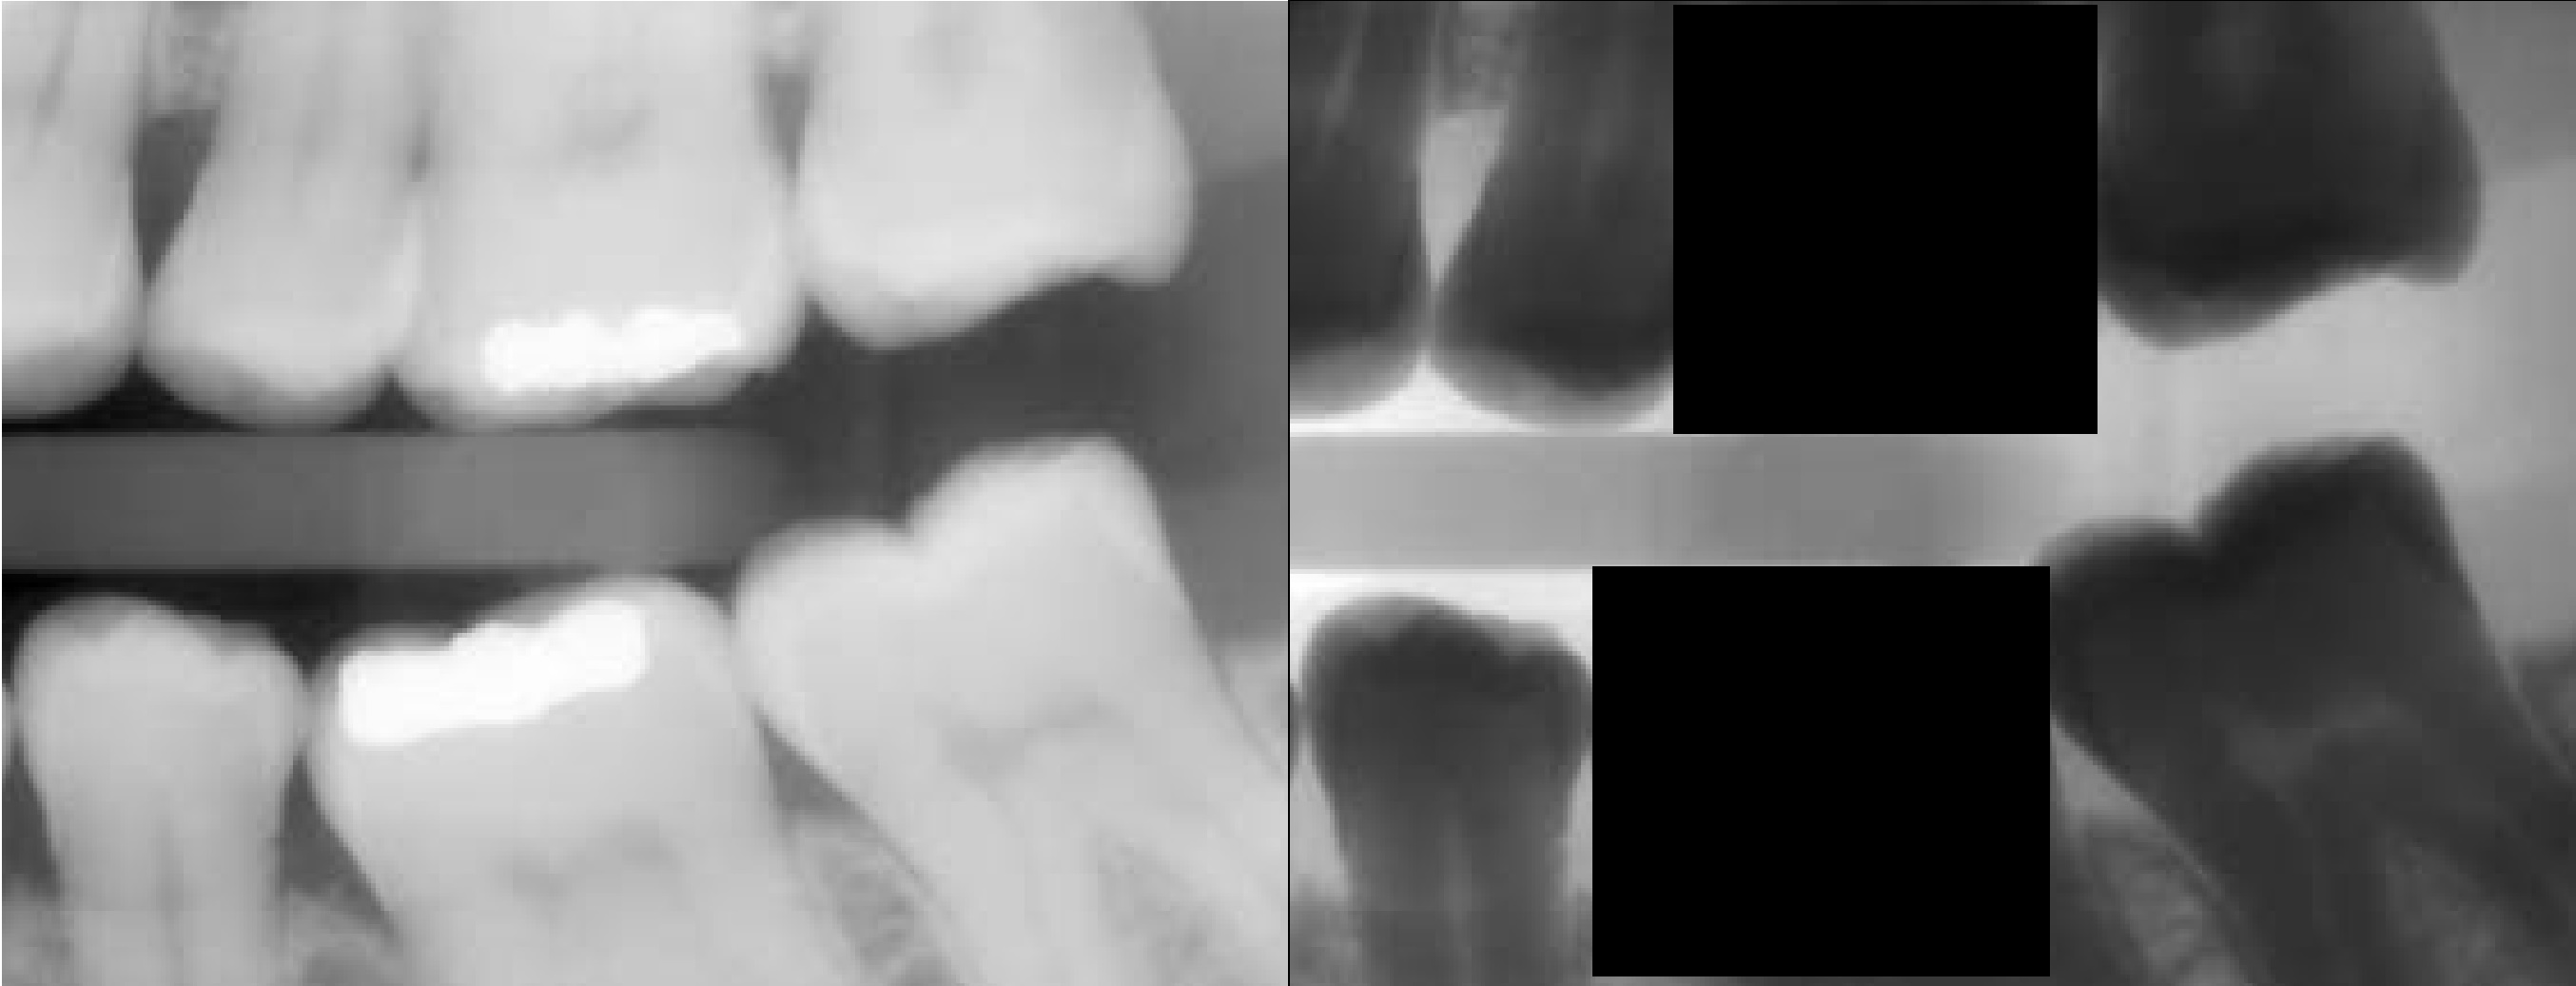

In [46]:
# XOR Operation 
img_xor = cv.imread('/content/drive/MyDrive/PCVK/Images/Images/teeth.jpg')
mask_xor = np.zeros(img_xor.shape, dtype=np.uint8)
mask_xor = cv.rectangle(mask_xor,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = ~img_xor & ~mask_xor

mask_xor1 = cv.rectangle(mask_xor,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_xor1= ~img_xor & ~mask_xor1

final_frame = cv.hconcat((img_xor, result_xor1))
cv2_imshow(final_frame)